In [1]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

# import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
bank = pd.read_csv('bank.csv', delimiter=';')

In [3]:
df = pd.DataFrame(bank)

In [4]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [5]:
# check data types
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
#Get the name of columns
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
#Extract data from column education
y =bank[['age','job']]
y

,age,job
0,30,blue-collar
1,39,services
2,25,services
3,38,services
4,47,admin.
...,...,...
4114,30,admin.
4115,39,admin.
4116,27,student
4117,58,admin.


In [8]:
#Copy the bank dataset
demo_bank = bank.copy()

In [9]:
#Remove reduntdant whitespaces
bank['job']= bank['job'].str.strip()
bank['job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [10]:
#Add reduntdant whitespaces
bank.loc[demo_bank.age.isin([30,39,25]), 'job'] = 'Null'
bank['job'].value_counts()

admin.           911
blue-collar      809
technician       626
Null             367
services         354
management       307
retired          165
self-employed    142
entrepreneur     134
housemaid        102
unemployed        98
student           66
unknown           38
Name: job, dtype: int64

In [11]:
# strip white spaces
bank['job'] = demo_bank['job'].str.strip()
bank['marital'] = demo_bank['marital'].str.strip()
bank['education'] = demo_bank['education'].str.strip()
bank['default'] = demo_bank['default'].str.strip()
bank['housing'] = demo_bank['housing'].str.strip()
bank['loan'] = demo_bank['loan'].str.strip()
bank['contact'] = demo_bank['contact'].str.strip()
bank['month'] = demo_bank['month'].str.strip()
bank['day_of_week'] = demo_bank['day_of_week'].str.strip()
bank['y'] = demo_bank['y'].str.strip()

In [42]:
#replace value in column
bank['job'] = bank['job'].str.replace('admin.','admin')
bank['housing'] = bank['housing'].str.replace('unknown','no')
bank['default'] = bank['default'].str.replace('unknown','no')
bank['loan'] = bank['loan'].str.replace('unknown','no')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,no,no,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [13]:
# check value count
bank['marital'].value_counts()

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [14]:
# check na
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
#fill na = 0
bank['duration'].fillna(0)

0       487
1       346
2       227
3        17
4        58
       ... 
4114     53
4115    219
4116     64
4117    528
4118    175
Name: duration, Length: 4119, dtype: int64

In [16]:
bank.mean(axis=0)

age                 40.113620
duration           256.788055
campaign             2.537266
pdays              960.422190
previous             0.190337
emp.var.rate         0.084972
cons.price.idx      93.579704
cons.conf.idx      -40.499102
euribor3m            3.621356
nr.employed       5166.481695
dtype: float64

In [17]:
#Categorical data
# label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels for the whole dataset. 
demo_bank['age']= label_encoder.fit_transform(demo_bank['age']) 
demo_bank['job']= label_encoder.fit_transform(demo_bank['job'])
demo_bank['marital']= label_encoder.fit_transform(demo_bank['marital'])
demo_bank['education']= label_encoder.fit_transform(demo_bank['education'])
demo_bank['default']= label_encoder.fit_transform(demo_bank['default'])
demo_bank['housing']= label_encoder.fit_transform(demo_bank['housing'])
demo_bank['loan']= label_encoder.fit_transform(demo_bank['loan'])
demo_bank['contact']= label_encoder.fit_transform(demo_bank['contact'])
demo_bank['month']= label_encoder.fit_transform(demo_bank['month'])
demo_bank['day_of_week']= label_encoder.fit_transform(demo_bank['day_of_week'])
demo_bank['duration']= label_encoder.fit_transform(demo_bank['duration'])
demo_bank['campaign']= label_encoder.fit_transform(demo_bank['campaign'])
demo_bank['pdays']= label_encoder.fit_transform(demo_bank['pdays'])
demo_bank['previous']= label_encoder.fit_transform(demo_bank['previous'])
demo_bank['poutcome']= label_encoder.fit_transform(demo_bank['poutcome'])
demo_bank['emp.var.rate']= label_encoder.fit_transform(demo_bank['emp.var.rate'])
demo_bank['cons.price.idx']= label_encoder.fit_transform(demo_bank['cons.price.idx'])
demo_bank['cons.conf.idx']= label_encoder.fit_transform(demo_bank['cons.conf.idx'])
demo_bank['euribor3m']= label_encoder.fit_transform(demo_bank['euribor3m'])
demo_bank['nr.employed']= label_encoder.fit_transform(demo_bank['nr.employed'])
demo_bank['y']= label_encoder.fit_transform(demo_bank['y'])
demo_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12,1,1,2,0,2,0,0,6,0,...,1,20,0,1,3,8,4,156,6,0
1,21,7,2,3,0,0,0,1,6,0,...,3,20,0,1,8,18,16,207,8,0
2,7,7,1,3,0,2,0,1,4,4,...,0,20,0,1,9,23,8,225,10,0
3,20,7,1,2,0,1,1,1,4,0,...,2,20,0,1,9,23,8,222,10,0
4,29,0,1,6,0,2,0,0,7,1,...,0,20,0,1,7,11,7,201,9,0


In [18]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 cvalue_counts with numerical values


#Code goes after this line


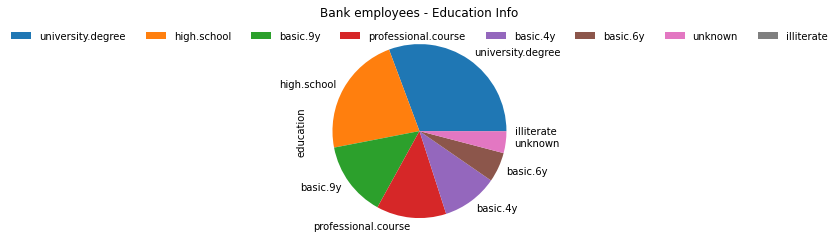

In [19]:
#pie chart for age
bank['education'].value_counts().plot(kind='pie')
plt.title('Bank employees - Education Info')
plt.legend(frameon=False, loc='upper center', ncol=8)

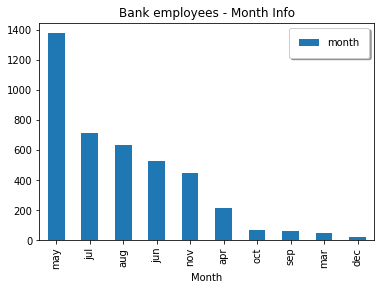

In [20]:
#bar chart for job
bank['month'].value_counts().plot(kind='bar')
plt.title('Bank employees - Month Info')
plt.xlabel('Month')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

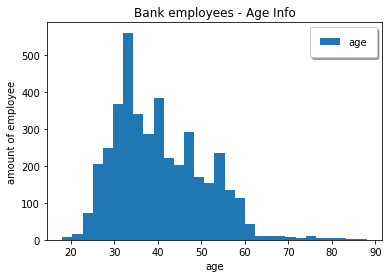

In [21]:
# histogram plot for age
bank['age'].plot(kind='hist', bins=30)
plt.title('Bank employees - Age Info')
plt.xlabel('age')
plt.ylabel('amount of employee')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

In [22]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line



In [23]:
#First Visualisations
#create a subset name 'job'
bank_subset = bank[['job']]
bank_subset

,job
0,blue-collar
1,services
2,services
3,services
4,admin
...,...
4114,admin
4115,admin
4116,student
4117,admin


In [24]:
bank_subset = pd.get_dummies(bank_subset)
bank_subset

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1,0,0,0,0,0,0,0,0,0,0,0
4115,1,0,0,0,0,0,0,0,0,0,0,0
4116,0,0,0,0,0,0,0,0,1,0,0,0
4117,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
bank_subset['age'] = bank['age']
bank_subset = bank_subset.groupby('age').sum()
bank_subset

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
age,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,3,0,0,0
19,0,0,0,0,0,0,0,0,1,0,0,0
20,0,1,0,0,0,0,0,0,3,0,0,0
21,0,1,0,0,0,0,0,1,5,0,0,0
22,1,5,0,0,0,0,0,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,0,0,0,0,3,0,0,0,0,0,0
82,0,0,0,2,0,0,0,0,0,0,0,0
85,0,0,0,1,0,0,0,0,0,0,0,0


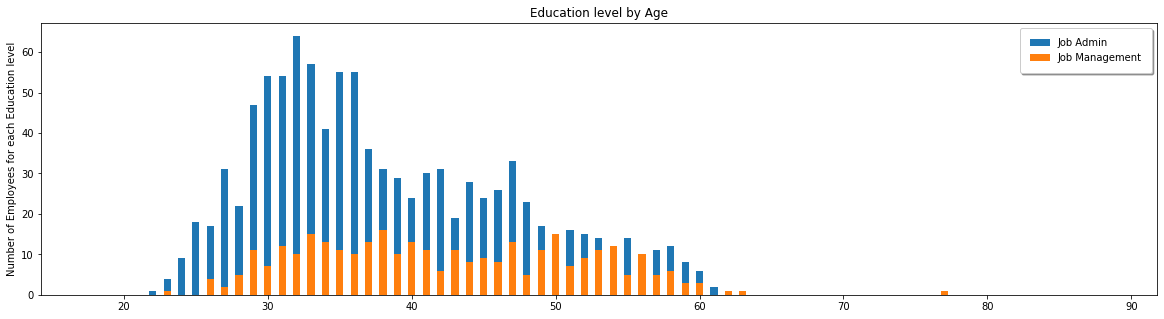

In [28]:
width = 0.5       # the width of the bars: can also be len(x) sequence
fig,ax = plt.subplots(figsize=(20,5))

ax.bar(bank_subset.index, bank_subset['job_admin'], width, label='Job Admin')
ax.bar(bank_subset.index, bank_subset['job_management'], width,
       label='Job Management')

ax.set_ylabel('Number of Employees for each Education level')
ax.set_title('Education level by Age')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

In [30]:
#Second Visualisations
#create a subset name 'job'
bank_subset = bank[['contact']]
bank_subset

,contact
0,cellular
1,telephone
2,telephone
3,telephone
4,cellular
...,...
4114,cellular
4115,telephone
4116,cellular
4117,cellular


In [31]:
bank_subset = pd.get_dummies(bank_subset)
bank_subset

,contact_cellular,contact_telephone
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
4114,1,0
4115,0,1
4116,1,0
4117,1,0


In [32]:
bank_subset['age'] = bank['age']
bank_subset = bank_subset.groupby('age').sum()
bank_subset

,contact_cellular,contact_telephone
age,,
18,2,1
19,1,0
20,4,0
21,6,1
22,6,4
...,...,...
81,3,0
82,1,1
85,0,1


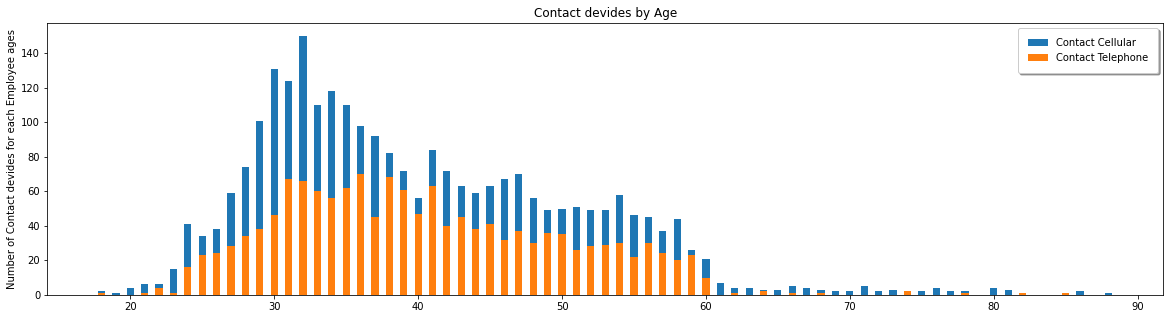

In [33]:
width = 0.5       # the width of the bars: can also be len(x) sequence
fig,ax = plt.subplots(figsize=(20,5))

ax.bar(bank_subset.index, bank_subset['contact_cellular'], width, label='Contact Cellular')
ax.bar(bank_subset.index, bank_subset['contact_telephone'], width,
       label='Contact Telephone')

ax.set_ylabel('Number of Contact devides for each Employee ages')
ax.set_title('Contact devides by Age')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

In [37]:
#Third Visualisations
#create a subset name 'housing'
bank_subset = bank[['housing']]
bank_subset

,housing
0,yes
1,no
2,yes
3,unknown
4,yes
...,...
4114,yes
4115,yes
4116,no
4117,no


In [38]:
bank_subset = pd.get_dummies(bank_subset)
bank_subset

,housing_no,housing_unknown,housing_yes
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
4114,0,0,1
4115,0,0,1
4116,1,0,0
4117,1,0,0


In [39]:
bank_subset['job'] = bank['job']
bank_subset = bank_subset.groupby('job').sum()
bank_subset

,housing_no,housing_unknown,housing_yes
job,,,
admin,441.0,15.0,556.0
blue-collar,417.0,28.0,439.0
entrepreneur,57.0,2.0,89.0
housemaid,47.0,3.0,60.0
management,145.0,3.0,176.0
retired,75.0,4.0,87.0
self-employed,73.0,7.0,79.0
services,189.0,19.0,185.0
student,44.0,0.0,38.0


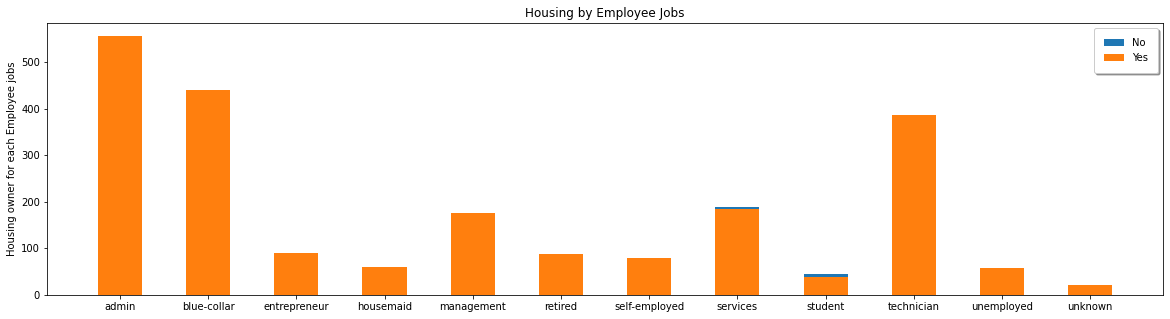

In [43]:
width = 0.5       # the width of the bars: can also be len(x) sequence
fig,ax = plt.subplots(figsize=(20,5))

ax.bar(bank_subset.index, bank_subset['housing_no'], width, label='No')
ax.bar(bank_subset.index, bank_subset['housing_yes'], width,
       label='Yes')

ax.set_ylabel('Housing owner for each Employee jobs')
ax.set_title('Housing by Employee Jobs')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

In [ ]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns

#Code goes after this line

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='duration', ylabel='age'>,
        <AxesSubplot:xlabel='campaign', ylabel='age'>,
        <AxesSubplot:xlabel='pdays', ylabel='age'>,
        <AxesSubplot:xlabel='previous', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='duration'>,
        <AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='campaign', ylabel='duration'>,
        <AxesSubplot:xlabel='pdays', ylabel='duration'>,
        <AxesSubplot:xlabel='previous', ylabel='duration'>],
       [<AxesSubplot:xlabel='age', ylabel='campaign'>,
        <AxesSubplot:xlabel='duration', ylabel='campaign'>,
        <AxesSubplot:xlabel='campaign', ylabel='campaign'>,
        <AxesSubplot:xlabel='pdays', ylabel='campaign'>,
        <AxesSubplot:xlabel='previous', ylabel='campaign'>],
       [<AxesSubplot:xlabel='age', ylabel='pdays'>,
        <AxesSubplot:xlabel='duration', ylabel='pdays'>,
        <AxesSubplot:xlabel='campaign

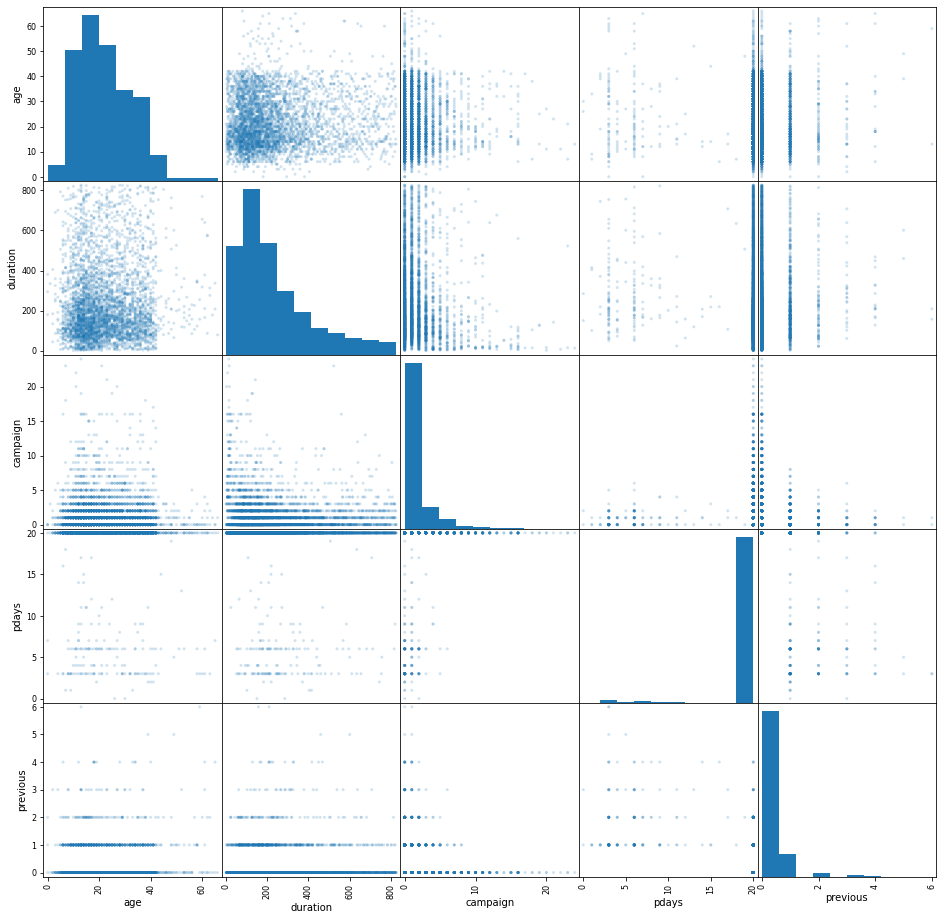

In [29]:
from pandas.plotting import scatter_matrix
numerical_col = ['age','duration','campaign','pdays','previous']
scatter_matrix(demo_bank[numerical_col],alpha=0.2,figsize=(16,16),diagonal='hist')